# Grid Search to Find Good Solution

In [121]:
# Imports
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from starmodel2 import starmodel
import matplotlib.colors as colors
%matplotlib inline

In [122]:
 def gridsearch(pars,lumrange,teffrange,nlum=10,nteff=10,verbose=False):
    """
    Run a grid search of starmodel.
    
    Parameters
    ----------
    pars : list
    
    lumrange : list
    
    dlum : float
    
    teffrange : list
    
    dteff : float
    
    
    Returns
    -------
    data : dict
       Dictionary with all of the information
       
    Example
    -------
    
    data = gridsearch([1.0,0.70,0.08],[0.8,1.2],0.02,[5000.0,6000.0],50)
    
    """
    # pars should be [total mass, X, Z]
    totmass = pars[0]
    X = pars[1]
    Z = pars[2]
    """ Search a grid in Luminosity and Teff"""
    luminosity = np.linspace(lumrange[0],lumrange[1],nlum,endpoint=True)
    temperature = np.linspace(teffrange[0],teffrange[1],nteff,endpoint=True)
    print('Search grid is ',len(luminosity),' x ',len(temperature))
    igoof = np.zeros((len(luminosity),len(temperature)),int)
    mass0 = np.zeros((len(luminosity),len(temperature)),float)
    lum0 = np.zeros((len(luminosity),len(temperature)),float)
    temp0 = np.zeros((len(luminosity),len(temperature)),float)
    for i,lum in enumerate(luminosity):
        for j,teff in enumerate(temperature):
            Igoof,ierr,istop,tab = starmodel(totmass,lum,teff,X,Z,verbose=False)
            igoof[i,j] = Igoof
            mass0[i,j] = tab['M'][-1]  # central shell
            lum0[i,j] = tab['L'][-1]   # central shell
            temp0[i,j] = tab['T'][-1]  # central shell
            if verbose:
                print(lum,teff,Igoof,mass0[i,j],lum0[i,j],temp0[i,j])
    
    data = {'luminosity':luminosity,'temperature':temperature,'igoof':igoof,
            'mass0':mass0,'lum0':lum0,'temp0':temp0}
    return data

In [123]:
def analyzeresults(data):
    """ Analyze the grid results """
    
    luminosity = data['luminosity']
    temperature = data['temperature']
    mass0 = data['mass0']
    lum0 = data['lum0']
    temp0 = data['temp0']
        
    fig,axs = plt.subplots(3,1,figsize=(8,20))
        
    # Mass results
    print('Mass results')
    print('------------')
    print('Min M0=',np.min(mass0))
    print('Max M0=',np.max(mass0))
    print('Min |M0|=',np.min(np.abs(mass0)))
    bestind = np.unravel_index(np.argmin(np.abs(mass0), axis=None), mass0.shape)
    print('Best index = ',bestind)
    print('Best Luminosity=',luminosity[bestind[0]])
    print('Best Temperature=',temperature[bestind[1]])
    print(' ')
    im1 = axs[0].imshow(mass0,extent=[temperature[0],temperature[-1],luminosity[0],luminosity[-1]],
               origin='lower',aspect='auto')
    axs[0].scatter(temperature[bestind[1]],luminosity[bestind[0]],c='r',marker='+',s=200)
    plt.colorbar(im1, ax=axs[0])
    
    # Luminosity results
    #print('Luminosity Results')
    #print('------------------')
    #print('Min M0=',np.min(lum0))
    #print('Max M0=',np.max(lum0))
    #print('Min |M0|=',np.min(np.abs(lum0)))
    #bestind = np.unravel_index(np.argmin(np.abs(lum0), axis=None), mass0.shape)
    #print('Best index = ',bestind)
    #print('Best Luminosity=',luminosity[bestind[0]])
    #print('Best Temperature=',temperature[bestind[1]])
    #print(' ')
    im2 = axs[1].imshow(lum0,extent=[temperature[0],temperature[-1],luminosity[0],luminosity[-1]],
               origin='lower',aspect='auto')
    #axs[1].scatter(temperature[bestind[1]],luminosity[bestind[0]],c='r',marker='+',s=200)
    plt.colorbar(im2, ax=axs[1])
        
    # Temperature figure
    im3 = axs[2].imshow(temp0,extent=[temperature[0],temperature[-1],luminosity[0],luminosity[-1]],
               origin='lower',aspect='auto')
    plt.colorbar(im3, ax=axs[2])

In [209]:
data = gridsearch([50.0,0.70,0.008],[97155,97170],[47740.0,47810.0],nlum=40,nteff=40)

Search grid is  40  x  40


Mass results
------------
Min M0= -3.2308860904193716e+33
Max M0= -3.3396375914252376e+28
Min |M0|= 3.3396375914252376e+28
Best index =  (2, 21)
Best Luminosity= 97155.76923076923
Best Temperature= 47777.692307692305
 


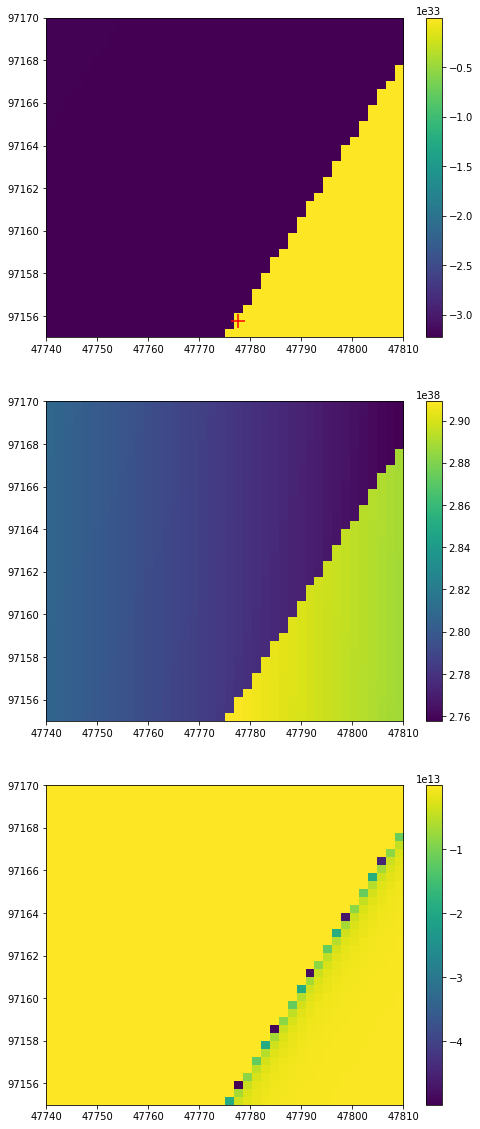

In [210]:
analyzeresults(data)

# Run example
mass = 1.0 <br>
luminosity = 0.86071 <br>
teff = 5500.2 <br>
X = 0.70 <br>
Z = 0.008

In [ ]:
Igoof,ierr,istop,tab = starmodel(0.8,0.22456,3960,0.70,0.008)

In [206]:
print('Central M=',tab['M'][-1])
print('Central L=',tab['L'][-1])

Central M= 9.945e+34
Central L= 5.74496856e+38


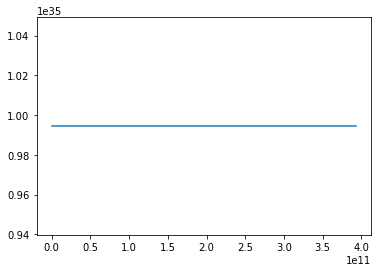

In [207]:
plt.plot(tab['r'],tab['M'])

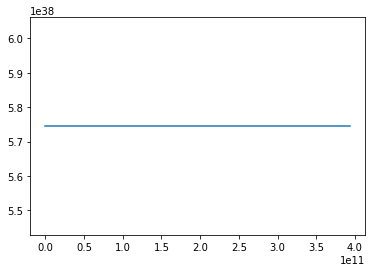

In [208]:
plt.plot(tab['r'],tab['L'])